In [1]:
from pathlib import Path

import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
from ipywidgets import FloatRangeSlider, jsdlink
from palettable.colorbrewer.diverging import BrBG_10

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap
from lonboard.controls import MultiRangeSlider
from lonboard.layer_extension import DataFilterExtension

In [2]:
!wget -O 2020_census_microdata_tiger_shapefile.zip https://data.payless.health/census.gov%2Famerican_community_survey%2F2020_census_microdata_tiger_shapefile.zip
!unzip 2020_census_microdata_tiger_shapefile.zip

--2024-02-14 13:17:13--  https://data.payless.health/census.gov%2Famerican_community_survey%2F2020_census_microdata_tiger_shapefile.zip
Resolving data.payless.health (data.payless.health)... 18.164.116.95, 18.164.116.15, 18.164.116.105, ...
Connecting to data.payless.health (data.payless.health)|18.164.116.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68488320 (65M) [application/zip]
Saving to: ‘2020_census_microdata_tiger_shapefile.zip’

2020_census_microda 100%[===================>]  65.32M  56.0MB/s    in 1.2s    

2024-02-14 13:17:14 (56.0 MB/s) - ‘2020_census_microdata_tiger_shapefile.zip’ saved [68488320/68488320]

Archive:  2020_census_microdata_tiger_shapefile.zip
 extracting: 2020_census_microdata_tiger_shapefile.cpg  
  inflating: 2020_census_microdata_tiger_shapefile.dbf  
  inflating: 2020_census_microdata_tiger_shapefile.shp  
  inflating: 2020_census_microdata_tiger_shapefile.shx  


In [2]:
!wget https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nypuma2020_23d.zip
!unzip nypuma2020_23d.zip

--2024-02-27 08:45:40--  https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nypuma2020_23d.zip
Resolving s-media.nyc.gov (s-media.nyc.gov)... 23.203.182.48
Connecting to s-media.nyc.gov (s-media.nyc.gov)|23.203.182.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 858870 (839K) [application/zip]
Saving to: ‘nypuma2020_23d.zip’

nypuma2020_23d.zip  100%[===================>] 838.74K  --.-KB/s    in 0.04s   

2024-02-27 08:45:41 (19.1 MB/s) - ‘nypuma2020_23d.zip’ saved [858870/858870]

Archive:  nypuma2020_23d.zip
  inflating: nypuma2020_23d/nypuma2020.shp  
  inflating: nypuma2020_23d/nypuma2020.dbf  
  inflating: nypuma2020_23d/nypuma2020.shx  
  inflating: nypuma2020_23d/nypuma2020.prj  
  inflating: nypuma2020_23d/nypuma2020.shp.xml  


## from census website

```
36 04103 NYC-Manhattan Community District 3--Lower East Side & Chinatown
36 04104 NYC-Manhattan Community District 4--Chelsea & Hell's Kitchen
36 04107 NYC-Manhattan Community District 7--Upper West Side
36 04108 NYC-Manhattan Community District 8--Upper East Side & Roosevelt Island
36 04109 NYC-Manhattan Community District 9--Morningside Heights & Hamilton Heights
36 04110 NYC-Manhattan Community District 10--Harlem
36 04111 NYC-Manhattan Community District 11--East Harlem
36 04112 NYC-Manhattan Community District 12--Washington Heights & Inwood
36 04121 NYC-Manhattan Community Districts 1 & 2--Financial District & Greenwich Village
36 04165 NYC-Manhattan Community Districts 5 & 6--Midtown, East Midtown, & Flatiron
36 04204 NYC-Bronx Community District 4--Highbridge & Concourse
36 04205 NYC-Bronx Community District 5--Morris Heights & Mount Hope
36 04207 NYC-Bronx Community District 7--Fordham, Bedford Park, & Norwood
36 04208 NYC-Bronx Community District 8--Riverdale, Kingsbridge, & Marble Hill
36 04209 NYC-Bronx Community District 9--Soundview & Parkchester
36 04210 NYC-Bronx Community District 10--Co-op City & Throgs Neck
36 04211 NYC-Bronx Community District 11--Pelham Parkway & Morris Park
36 04212 NYC-Bronx Community District 12--Wakefield, Williamsbridge, & Eastchester
36 04221 NYC-Bronx Community Districts 1 & 2--Melrose, Mott Haven, Longwood, & Hunts Point
36 04263 NYC-Bronx Community Districts 3 & 6--Morrisania, Tremont, Belmont, & West Farms 
36 04301 NYC-Brooklyn Community District 1--Williamsburg & Greenpoint
36 04302 NYC-Brooklyn Community District 2--Downtown Brooklyn & Fort Greene
36 04303 NYC-Brooklyn Community District 3--Bedford-Stuyvesant
36 04304 NYC-Brooklyn Community District 4--Bushwick
36 04305 NYC-Brooklyn Community District 5--East New York & Cypress Hills
36 04306 NYC-Brooklyn Community District 6--Park Slope & Carroll Gardens
36 04307 NYC-Brooklyn Community District 7--Sunset Park & Windsor Terrace
36 04308 NYC-Brooklyn Community District 8--Crown Heights (North)
36 04309 NYC-Brooklyn Community District 9--Crown Heights (South)
36 04310 NYC-Brooklyn Community District 10--Bay Ridge & Dyker Heights
36 04311 NYC-Brooklyn Community District 11--Bensonhurst & Bath Beach
36 04312 NYC-Brooklyn Community District 12--Borough Park & Kensington
36 04313 NYC-Brooklyn Community District 13--Coney Island & Brighton Beach
36 04314 NYC-Brooklyn Community District 14--Flatbush & Midwood
36 04315 NYC-Brooklyn Community District 15--Sheepshead Bay & Gravesend (East)
36 04316 NYC-Brooklyn Community District 16--Ocean Hill & Brownsville
36 04317 NYC-Brooklyn Community District 17--East Flatbush
36 04318 NYC-Brooklyn Community District 18--Canarsie & Flatlands
36 04401 NYC-Queens Community District 1--Astoria & Queensbridge
36 04402 NYC-Queens Community District 2--Long Island City, Sunnyside, & Woodside
36 04403 NYC-Queens Community District 3--Jackson Heights & East Elmhurst
36 04404 NYC-Queens Community District 4--Elmhurst & Corona
36 04405 NYC-Queens Community District 5--Ridgewood, Maspeth, & Middle Village
36 04406 NYC-Queens Community District 6--Forest Hills & Rego Park
36 04407 NYC-Queens Community District 7--Flushing, Murray Hill, & Whitestone
36 04408 NYC-Queens Community District 8--Fresh Meadows, Hillcrest, & Briarwood
36 04409 NYC-Queens Community District 9--Kew Gardens, Richmond Hill, & Woodhaven
36 04410 NYC-Queens Community District 10--South Ozone Park & Howard Beach
36 04411 NYC-Queens Community District 11--Auburndale, Bayside, & Douglaston
36 04412 NYC-Queens Community District 12--Jamaica, St. Albans, & Hollis
36 04413 NYC-Queens Community District 13--Queens Village, Bellerose, & Rosedale
36 04414 NYC-Queens Community District 14--The Rockaways
36 04501 NYC-Staten Island Community District 1--North Shore
36 04502 NYC-Staten Island Community District 2--Mid-Island
36 04503 NYC-Staten Island Community District 3--South Shore 
```

In [3]:
nyc_2020_pumas = [
    "04103",
    "04104",
    "04107",
    "04108",
    "04109",
    "04110",
    "04111",
    "04112",
    "04121",
    "04165",
    "04204",
    "04205",
    "04207",
    "04208",
    "04209",
    "04210",
    "04211",
    "04212",
    "04221",
    "04263",
    "04301",
    "04302",
    "04303",
    "04304",
    "04305",
    "04306",
    "04307",
    "04308",
    "04309",
    "04310",
    "04311",
    "04312",
    "04313",
    "04314",
    "04315",
    "04316",
    "04317",
    "04318",
    "04401",
    "04402",
    "04403",
    "04404",
    "04405",
    "04406",
    "04407",
    "04408",
    "04409",
    "04410",
    "04411",
    "04412",
    "04413",
    "04414",
    "04501",
    "04502",
    "04503",
]

In [4]:
from pathlib import Path
import pandas as pd

url_first = "https://data.payless.health/census.gov%2Famerican_community_survey%2Fpublic_use_microdata%2F2022_acs_pums_individual_people_united_states_first_tranche.parquet"
url_second = "https://data.payless.health/census.gov%2Famerican_community_survey%2Fpublic_use_microdata%2F2022_acs_pums_individual_people_united_states_second_tranche.parquet"
local_path = Path("2022_acs_pums_individual_people_united_states.parquet")

# Check if the local file exists to avoid re-downloading
columns_of_interest = ["Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)", 
                       "Total person's income (use ADJINC to adjust to constant dollars)", 
                       "Grandparents living with grandchildren"]
if not local_path.exists():
    df_first = pd.read_parquet(url_first, columns=columns_of_interest)
    df_second = pd.read_parquet(url_second, columns=columns_of_interest)
    df = pd.concat([df_first, df_second])

    df.rename(columns={"Public use microdata area code (PUMA) based on 2020 Census definition (areas with population of 100,000 or more, use with ST for unique code)": "puma",
                        "Total person's income (use ADJINC to adjust to constant dollars)": "income",
                        "Grandparents living with grandchildren": "grandparents"}, inplace=True)
    df.to_parquet(local_path)
else:
    df = pd.read_parquet(local_path)


shapefile_path = "/Users/me/data/american_community_survey/2020_census_microdata_tiger_shapefile.shp"
puma_shapes = gpd.read_file(shapefile_path)
puma_shapes = puma_shapes.rename(columns={'PUMACE20': "puma", 'NAMELSAD20': 'name'})
puma_to_name = puma_shapes.set_index('puma')['name'].to_dict()
# puma_shapes['centroid'] = shapely.centroid(puma_shapes['geometry'])

# puma_nyc_website_path = "/Users/me/jaanli/exploring_american_community_survey_data/NYC_PUMA/geo_export_51740b42-02e2-4873-8576-4080276366a3.shp"
# puma_shapes = gpd.read_file(puma_nyc_website_path)
# puma_shapes['puma'] = puma_shapes['puma'].apply(lambda x: '0' + x)
# nyc_puma_list = puma_shapes['puma'].values.tolist()
# puma_shapes['centroid'] = shapely.centroid(puma_shapes['geometry'])

len(puma_shapes['puma'].unique()), len(df['puma'].unique())
missing_pumas = set(df['puma'].unique()) - set(puma_shapes['puma'].unique())
print('missing pumas', len(missing_pumas))
print('missing pumas', missing_pumas)

# drop missing pumas
df = df[df['puma'].isin(nyc_2020_pumas)]
merged_df = df.merge(puma_shapes[["puma", "geometry"]], on="puma",
                      how='left')
# filter for nan values 
# idx = ~merged_df['centroid'].isna() & ~merged_df['income'].isna()
idx = ~merged_df['income'].isna()
merged_df['grandparents'] = merged_df['grandparents'].fillna(0)
merged_df['grandparents'] = merged_df['grandparents'].astype(int)
idx = idx & ~merged_df['grandparents'].isna()
print('sum', idx.sum())

# filter for city
# nyc_puma_list = puma_shapes[puma_shapes['NAMELSAD10'].apply(lambda x: 'nyc' in x.lower())]['puma'].values.tolist()
# idx = merged_df['puma'].isin(nyc_puma_list)
merged_df['income'] = merged_df["income"].astype(float)
merged_df['area_name'] = merged_df['puma'].map(puma_to_name)
gdf = gpd.GeoDataFrame(merged_df[["puma", "grandparents", "area_name", "income"]][idx], geometry=merged_df["geometry"][idx])
# randomly sample 10% of the data
# gdf = gdf.sample(frac=0.001, random_state=42, replace=False)
print('length', len(gdf))
gdf.head()

missing pumas 0
missing pumas set()
sum 136132
length 136132


,puma,grandparents,area_name,income,geometry
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."


In [5]:
# https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nypuma2020_23d.zip
# https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page
puma_nyc_website_path = "nypuma2020_23d/nypuma2020.shp"
puma_shapes_nyc_website = gpd.read_file(puma_nyc_website_path)
puma_shapes_nyc_website.rename(columns={'PUMA': 'puma'}, inplace=True)

<Axes: >

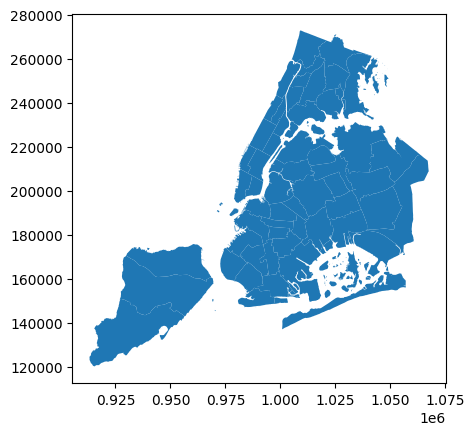

In [6]:
puma_shapes_nyc_website.plot()

In [7]:
!curl https://data.cityofnewyork.us/api/geospatial/taua-pmp6?method=export&format=Shapefile

In [8]:
puma_nyc_website_path = "/Users/me/jaanli/exploring_american_community_survey_data/NYC_PUMA/geo_export_51740b42-02e2-4873-8576-4080276366a3.shp"
puma_shapes_nyc_website = gpd.read_file(puma_nyc_website_path)

DriverError: /Users/me/jaanli/exploring_american_community_survey_data/NYC_PUMA/geo_export_51740b42-02e2-4873-8576-4080276366a3.shp: No such file or directory

In [9]:
puma_shapes_nyc_website['puma'].values.tolist()

['4103',
 '4104',
 '4107',
 '4108',
 '4109',
 '4110',
 '4111',
 '4112',
 '4121',
 '4165',
 '4204',
 '4205',
 '4207',
 '4208',
 '4209',
 '4210',
 '4211',
 '4212',
 '4221',
 '4263',
 '4301',
 '4302',
 '4303',
 '4304',
 '4305',
 '4306',
 '4307',
 '4308',
 '4309',
 '4310',
 '4311',
 '4312',
 '4313',
 '4314',
 '4315',
 '4316',
 '4317',
 '4318',
 '4401',
 '4402',
 '4403',
 '4404',
 '4405',
 '4406',
 '4407',
 '4408',
 '4409',
 '4410',
 '4411',
 '4412',
 '4413',
 '4414',
 '4501',
 '4502',
 '4503']

<Axes: >

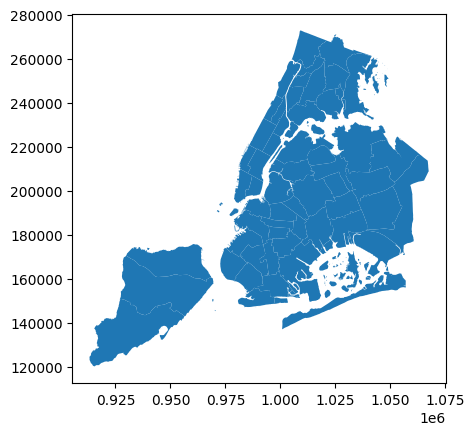

In [10]:
puma_shapes_nyc_website.plot()

In [11]:
gdf['puma'].isin(nyc_2020_pumas).sum(), len(gdf['puma'][gdf['puma'].isin(nyc_2020_pumas)].unique())

(136132, 55)

In [12]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
from numba import njit
from geopandas.array import points_from_xy

@njit
def generate_candidate_points(xmin, xmax, ymin, ymax, size, seed):
    """
    Generate candidate points within the bounding box defined by xmin, xmax, ymin, ymax.
    """
    rng = np.random.default_rng(seed)
    x = rng.uniform(xmin, xmax, size)
    y = rng.uniform(ymin, ymax, size)
    return x, y

def uniform_polygon_sampling(geom, size, seed=None):
    """
    Sample uniformly from within a polygon using batched sampling and Numba for speed-up.
    """
    xmin, ymin, xmax, ymax = geom.bounds
    candidates = gpd.GeoSeries([], crs='EPSG:4326')
    count = 0
    
    while count < size:
        x, y = generate_candidate_points(xmin, xmax, ymin, ymax, size=size * 10, seed=seed)  # Generate excess points
        batch = gpd.GeoSeries(points_from_xy(x, y), crs='EPSG:4326')
        valid_samples = batch[batch.intersects(geom)]  # Numba can't optimize this part
        
        # Update candidates and count
        candidates = candidates.append(valid_samples).head(size)
        count = len(candidates)
    
    return candidates.head(size)

# Example usage within the parallelized framework would look similar to before,
# but you replace the sampling function with `uniform_polygon_sampling`.


In [13]:
len(set(puma_shapes['puma'].unique()))

1150

In [14]:
from joblib import Parallel, delayed

def check_contains(batch, geom):
    """Check if points in the batch are contained within the given geometry using spatial index."""
    # Ensure the batch has a spatial index, which is necessary for efficient querying
    if not batch.sindex:
        batch = batch.copy()
        batch.sindex
    return batch.iloc[batch.sindex.query(geom, predicate="contains")]

def uniform_polygon_sampling(geom, size, seed=None):
    xmin, ymin, xmax, ymax = geom.bounds
    total_required = size
    candidates = gpd.GeoSeries([], crs='EPSG:4326')

    # Adjust the batch size if necessary
    batch_size = size * 10
    while len(candidates) < total_required:
        # Generate a large batch of points
        x, y = generate_candidate_points(xmin, xmax, ymin, ymax, size=batch_size, seed=seed)
        batch = gpd.GeoSeries(points_from_xy(x, y), crs='EPSG:4326')

        # Parallelize the containment check using spatial indexing
        n_jobs = -1  # Use all available cores
        num_chunks = 4  # Adjust based on your system's capability and the size of the batch
        chunk_size = len(batch) // num_chunks
        results = Parallel(n_jobs=n_jobs)(
            delayed(check_contains)(batch[i:i+chunk_size], geom) for i in range(0, len(batch), chunk_size)
        )

        # Concatenate results from all chunks
        valid_samples = pd.concat(results)

        # Append valid samples to candidates GeoSeries
        candidates = pd.concat([candidates, valid_samples])

        # If not enough candidates were found, increase batch size for the next iteration
        if len(candidates) < total_required:
            batch_size *= 2  # Double the batch size to try to ensure we get enough points

    return candidates.iloc[:total_required]


puma_counts = gdf['puma'].value_counts().rename_axis('puma').reset_index(name='count')
print('Length:', len(puma_counts))
print('Unique pumas:', len(puma_counts['puma'].unique()))

puma_shapes_subset = puma_shapes[puma_shapes['puma'].isin(puma_counts['puma'])]

num_people_in_area = puma_shapes_subset.merge(puma_counts, on='puma', how='left')
num_people_in_area['count'] = num_people_in_area['count'].fillna(0).astype(int)

from tqdm.auto import tqdm

# Assuming `uniform_polygon_sampling` and all necessary imports are already defined

# Function to process each row of the merged DataFrame
def process_puma(row):
    geom = row.geometry
    count = row['count']
    seed = 42  # or any other way to define a seed, possibly based on the PUMA for reproducibility
    
    if count > 0:
        sampled_points = uniform_polygon_sampling(geom, count, seed=seed)
    else:
        sampled_points = gpd.GeoSeries([], crs='EPSG:4326')

    return sampled_points

# Sample points for each PUMA and store the result in a list
sampled_points_list = []
puma_for_sampled_points = []
for index, row in tqdm(num_people_in_area.iterrows(), total=num_people_in_area.shape[0]):
    sampled_points = process_puma(row)
    sampled_points_list.append(sampled_points)
    puma_for_sampled_points.extend([row['puma']] * len(sampled_points))

# Assuming you want to combine all sampled points into a single GeoSeries
all_sampled_points = pd.concat(sampled_points_list).reset_index(drop=True)

# If you need to maintain a reference to the original PUMA for each point, you could adjust the approach to include PUMA identifiers with the points


Length: 55
Unique pumas: 55


  0%|          | 0/73 [00:00<?, ?it/s]

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'default_rng' of type Module(<module 'numpy.random' from '/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/numpy/random/__init__.py'>)
[1m
File "../../../../var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_11845/4092510509.py", line 12:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m
[0m[1mDuring: typing of get attribute at /var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_11845/4092510509.py (12)[0m
[1m
File "../../../../var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_11845/4092510509.py", line 12:[0m
[1m<source missing, REPL/exec in use?>[0m


In [15]:
puma_counts

,puma,count
0,04501,20724
1,04301,18272
2,04302,9492
3,04103,8373
4,04502,5392
5,04307,4644
6,04503,4376
7,04303,4124
8,04305,3976
9,04104,3894


In [16]:
num_people_in_area['count'].sum()

322492

In [17]:
import geopandas as gpd
import pandas as pd
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import numpy as np
from numba import njit
from geopandas.array import points_from_xy

# Assuming puma_shapes and gdf are predefined GeoDataFrames

puma_counts = gdf['puma'].value_counts().rename_axis('puma').reset_index(name='count')
print('Length:', len(puma_counts))
print('Unique pumas:', len(puma_counts['puma'].unique()))

puma_shapes_subset = puma_shapes[puma_shapes['puma'].isin(puma_counts['puma'])]

num_people_in_area = puma_shapes_subset.merge(puma_counts, on='puma', how='left')
num_people_in_area['count'] = num_people_in_area['count'].fillna(0).astype(int)

@njit
def generate_candidate_points(xmin, xmax, ymin, ymax, size, seed=42):
    np.random.seed(seed)
    x = np.random.uniform(xmin, xmax, size)
    y = np.random.uniform(ymin, ymax, size)
    return x, y


def uniform_polygon_sampling(geom, size, seed=None):
    xmin, ymin, xmax, ymax = geom.bounds
    candidates = gpd.GeoSeries([], crs='EPSG:4326')
    generated_size = 0

    while generated_size < size:
        x, y = generate_candidate_points(xmin, xmax, ymin, ymax, size=size * 10, seed=seed)
        batch = gpd.GeoSeries(points_from_xy(x, y), crs='EPSG:4326')
        valid_samples = batch[batch.intersects(geom)]

        # Correctly handle appending of GeoSeries objects
        candidates = pd.concat([candidates, valid_samples])
        generated_size = len(candidates)

    return candidates.iloc[:size]



def sample_points_for_puma_optimized(row, seed=42):
    if row['count'] > 0:
        sampled_points = uniform_polygon_sampling(row.geometry, row['count'], seed)
    else:
        sampled_points = gpd.GeoSeries([], crs=num_people_in_area.crs)
    
    return sampled_points

sampled_points_list = Parallel(n_jobs=-1, verbose=10)(
    delayed(sample_points_for_puma_optimized)(row, seed=42)
    for index, row in tqdm(num_people_in_area.iterrows(), total=num_people_in_area.shape[0])
)

all_sampled_points = gpd.GeoSeries(pd.concat(sampled_points_list, ignore_index=True), crs=num_people_in_area.crs)


Length: 55
Unique pumas: 55


  0%|          | 0/73 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  58 out of  73 | elapsed:    6.1s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  66 out of  73 | elapsed:   18.0s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  73 out of  73 | elapsed:   48.8s finished


In [18]:
import geopandas as gpd
import pandas as pd
from tqdm.auto import tqdm  # Use the automatic interface of tqdm for progress bars
from joblib import Parallel, delayed

# Assuming puma_shapes and gdf are already defined and loaded as GeoDataFrames

# Calculate counts of occurrences per PUMA
puma_counts = gdf['puma'].value_counts().rename_axis('puma').reset_index(name='count')
print('Length:', len(puma_counts))
print('Unique pumas:', len(puma_counts['puma'].unique()))

# Subset shapes to those in the counts DataFrame
puma_shapes_subset = puma_shapes_nyc_website[puma_shapes_nyc_website['puma'].isin(puma_counts['puma'])]

# Merge to get the number of people in each area
num_people_in_area = puma_shapes_subset.merge(puma_counts, on='puma', how='left')
num_people_in_area['count'] = num_people_in_area['count'].fillna(0).astype(int)

# Define a function to sample points for each geometry in a GeoSeries
def sample_points_for_puma(row, seed=42):
    """
    Sample a specified number of points from the geometry of a single PUMA row.
    
    :param row: A row from the GeoDataFrame, containing the 'geometry' and 'count' fields
    :param seed: Random seed for reproducibility
    :return: A GeoSeries of sampled points
    """
    # Ensure the geometry is wrapped in a GeoSeries
    geo_series = gpd.GeoSeries([row.geometry], crs=num_people_in_area.crs)
    
    # Use the GeoSeries.sample_points method to sample
    if row['count'] > 0:
        sampled_points = geo_series.sample_points(size=row['count'], random_state=seed)
    else:
        # Return an empty GeoSeries if count is 0
        sampled_points = gpd.GeoSeries([], crs=num_people_in_area.crs)
    
    return sampled_points

# Parallel processing with tqdm for progress monitoring
sampled_points_list = Parallel(n_jobs=-1, verbose=10)(
    delayed(sample_points_for_puma)(row, seed=42)
    for index, row in tqdm(num_people_in_area.iterrows(), total=num_people_in_area.shape[0])
)

# Concatenate the results into a single GeoSeries
all_sampled_points = gpd.GeoSeries(pd.concat(sampled_points_list, ignore_index=True), crs=num_people_in_area.crs)


Length: 55
Unique pumas: 55


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


ValueError: No objects to concatenate

In [19]:
gdf

,puma,grandparents,area_name,income,geometry
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
...,...,...,...,...,...
159561,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,"MULTIPOLYGON (((-122.37598 38.04847, -122.3766..."
159562,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,"POLYGON ((-77.42310 37.23098, -77.42311 37.230..."
159563,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,"POLYGON ((-73.98653 40.70498, -73.98662 40.704..."
159564,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,"MULTIPOLYGON (((-122.37598 38.04847, -122.3766..."


In [20]:
puma_shapes_nyc_website['puma'] = puma_shapes_nyc_website['puma'].apply(lambda x: '0' + x)

In [21]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm

puma_counts = gdf['puma'].value_counts().rename_axis('puma').reset_index(name='count')
print('length', len(puma_counts))
subsets = []
for puma in tqdm(nyc_2020_pumas):
    subsets.append(puma_shapes_nyc_website[puma_shapes_nyc_website['puma'] == puma])
puma_shapes_subset = pd.concat(subsets)
num_people_in_area = puma_shapes_subset.merge(puma_counts, on='puma')
num_people_in_area['count'] = num_people_in_area['count'].fillna(0).astype(int)
sampled_points = num_people_in_area['geometry'].sample_points(size=num_people_in_area['count'], seed=42)


length 55


100%|██████████| 55/55 [00:00<00:00, 6387.91it/s]
/var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_11845/2234212525.py:13: FutureWarning: The 'seed' keyword is deprecated. Use 'rng' instead.
  sampled_points = num_people_in_area['geometry'].sample_points(size=num_people_in_area['count'], seed=42)


In [22]:
sampled_points

0     MULTIPOINT (983852.137 199308.062, 983878.809 ...
1     MULTIPOINT (980954.761 210193.015, 981075.379 ...
2     MULTIPOINT (985909.106 220861.635, 986042.108 ...
3     MULTIPOINT (992019.035 217574.125, 992100.763 ...
4     MULTIPOINT (992359.085 233016.726, 992543.285 ...
5     MULTIPOINT (995673.424 231149.023, 995773.978 ...
6     MULTIPOINT (996710.287 226585.082, 996916.366 ...
7     MULTIPOINT (998214.959 243343.229, 998326.659 ...
8     MULTIPOINT (971059.557 190607.297, 971366.090 ...
9     MULTIPOINT (985270.520 211796.164, 985284.970 ...
10    MULTIPOINT (1002659.886 242609.146, 1002748.89...
11    MULTIPOINT (1004298.799 247283.826, 1004338.34...
12    MULTIPOINT (1006869.740 251787.416, 1006930.92...
13    MULTIPOINT (1005359.168 259674.833, 1005706.95...
14    MULTIPOINT (1016292.614 239033.329, 1016323.85...
15    MULTIPOINT (1025274.086 245783.425, 1025336.28...
16    MULTIPOINT (1019362.143 245319.396, 1019522.27...
17    MULTIPOINT (1017570.770 264648.882, 101761

In [23]:
puma_shapes_subset['puma'].values, len(puma_shapes_subset['puma'].values)

(array(['04103', '04104', '04107', '04108', '04109', '04110', '04111',
        '04112', '04121', '04165', '04204', '04205', '04207', '04208',
        '04209', '04210', '04211', '04212', '04221', '04263', '04301',
        '04302', '04303', '04304', '04305', '04306', '04307', '04308',
        '04309', '04310', '04311', '04312', '04313', '04314', '04315',
        '04316', '04317', '04318', '04401', '04402', '04403', '04404',
        '04405', '04406', '04407', '04408', '04409', '04410', '04411',
        '04412', '04413', '04414', '04501', '04502', '04503'], dtype=object),
 55)

In [24]:
len(num_people_in_area['puma'].values)

55

In [25]:
gdf

,puma,grandparents,area_name,income,geometry
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-122.52999 37.99001, -122.52982 37.9..."
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,"POLYGON ((-73.99634 40.73804, -73.99684 40.737..."
...,...,...,...,...,...
159561,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,"MULTIPOLYGON (((-122.37598 38.04847, -122.3766..."
159562,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,"POLYGON ((-77.42310 37.23098, -77.42311 37.230..."
159563,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,"POLYGON ((-73.98653 40.70498, -73.98662 40.704..."
159564,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,"MULTIPOLYGON (((-122.37598 38.04847, -122.3766..."


In [26]:
import numpy as np
import pandas as pd
import geopandas as gpd

points_for_people = sampled_points.explode().reset_index(drop=True)
puma_to_point_index = {puma: [] for puma in num_people_in_area['puma'].values.tolist()}
pumas, counts = num_people_in_area['puma'], num_people_in_area['count']
puma_enum = np.arange(len(num_people_in_area))
# flatten and multiply
pumas = np.repeat(pumas, counts)
puma_indices = np.repeat(puma_enum, counts)

for i, puma in enumerate(np.unique(pumas)):
    idx = np.where(pumas == puma)[0]
    puma_to_point_index[puma].extend(idx.tolist())


/var/folders/j6/7vrpplt53hs3z_nyd8j0zqsh0000gn/T/ipykernel_11845/1815763699.py:5: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  points_for_people = sampled_points.explode().reset_index(drop=True)


In [27]:
len(puma_to_point_index)

55

In [28]:
# Now you have a mapping of PUMA to list of indices of points
# Shuffle the indices for each PUMA to ensure random assignment
for puma in puma_to_point_index:
    np.random.shuffle(puma_to_point_index[puma])

# Assign points to individuals in 'df' based on their PUMA
def assign_point(puma):
    if puma_to_point_index[puma]:
        return puma_to_point_index[puma].pop()  # This pops an index, ensuring it's used only once
    else:
        return None  # Or handle the case where no points are left for the PUMA

# Use apply to assign a point index to each row in df based on its PUMA
gdf['point_index'] = gdf['puma'].apply(assign_point)

# Map the point geometries to df using the assigned indices
gdf['geometry'] = gdf['point_index'].apply(lambda x: points_for_people.iloc[x] if pd.notnull(x) else None)

# Convert df to a GeoDataFrame
# gdf = gpd.GeoDataFrame(df, geometry='geometry')
# gdf.crs = sampled_points.crs  # Assuming CRS needs setting


In [29]:
gdf.head(), len(gdf)

(    puma  grandparents                                          area_name  \
 0  04104             2  Marin County (Southeast)--San Rafael (South), ...   
 1  04104             2  Marin County (Southeast)--San Rafael (South), ...   
 2  04104             2  Marin County (Southeast)--San Rafael (South), ...   
 3  04104             2  Marin County (Southeast)--San Rafael (South), ...   
 4  04104             2  Marin County (Southeast)--San Rafael (South), ...   
 
    income                       geometry  point_index  
 0     0.0  POINT (986861.790 218214.877)        11805  
 1     0.0  POINT (986606.542 219702.337)        11705  
 2     0.0  POINT (982611.064 211166.245)         8719  
 3     0.0  POINT (984379.569 216658.469)         9870  
 4     0.0  POINT (986144.853 215559.440)        11443  ,
 136132)

In [30]:
filter_extension = DataFilterExtension(filter_size=2)

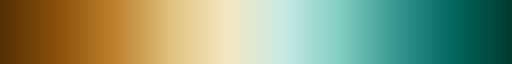

In [31]:
BrBG_10.mpl_colormap

In [32]:
# If you want to define specific bounds for normalization:
min_bound = 5000  # Example minimum income
max_bound = 100000  # Example maximum income

normalized_income = (gdf["income"].values.astype(float) - min_bound) / (max_bound - min_bound)

fill_color = apply_continuous_cmap(normalized_income, BrBG_10)

radius = normalized_income * 200  # Adjust 200 as per your visualization needs

In [33]:
# filter_values = gdf["income"]
initial_filter_range = [5_000, 100_000]
filter_values = np.column_stack(
    [gdf["income"], gdf["grandparents"]]
)
initial_filter_range = [
    [10_000, 50_000],
    [0, 5],
]



In [34]:
gdf

,puma,grandparents,area_name,income,geometry,point_index
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986861.790 218214.877),11805
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986606.542 219702.337),11705
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (982611.064 211166.245),8719
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (984379.569 216658.469),9870
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986144.853 215559.440),11443
...,...,...,...,...,...,...
159561,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (987051.621 204576.399),2590
159562,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (989527.470 205011.999),6057
159563,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (985795.390 198441.321),1249
159564,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (987348.196 205720.684),3060


In [35]:
gdf.crs = "EPSG:2263"  # Make sure to replace this with the correct EPSG code for your data

# Convert the GeoDataFrame to WGS84 (EPSG:4326)
gdf_wgs84 = gdf.to_crs(epsg=4326)

In [36]:
gdf_wgs84

,puma,grandparents,area_name,income,geometry,point_index
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (-73.99057 40.76563),11805
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (-73.99149 40.76971),11705
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (-74.00591 40.74628),8719
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (-73.99953 40.76135),9870
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (-73.99316 40.75834),11443
...,...,...,...,...,...,...
159561,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (-73.98989 40.72819),2590
159562,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (-73.98096 40.72939),6057
159563,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (-73.99443 40.71135),1249
159564,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (-73.98882 40.73133),3060


In [37]:
gdf

,puma,grandparents,area_name,income,geometry,point_index
0,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986861.790 218214.877),11805
1,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986606.542 219702.337),11705
2,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (982611.064 211166.245),8719
3,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (984379.569 216658.469),9870
4,04104,2,"Marin County (Southeast)--San Rafael (South), ...",0.0,POINT (986144.853 215559.440),11443
...,...,...,...,...,...,...
159561,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (987051.621 204576.399),2590
159562,04103,0,Chesterfield County (West)--Brandermill & Wood...,100.0,POINT (989527.470 205011.999),6057
159563,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (985795.390 198441.321),1249
159564,04103,2,Chesterfield County (West)--Brandermill & Wood...,54600.0,POINT (987348.196 205720.684),3060


In [47]:
layer = ScatterplotLayer.from_geopandas(
    gdf_wgs84,
    extensions=[filter_extension],
    get_fill_color=fill_color,
    get_radius=radius,
    get_filter_value=filter_values,
    filter_range=initial_filter_range,
    radius_units="meters",
    radius_min_pixels=0.1,
)
m = Map(layer)
m

/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/lonboard/_utils.py:57: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(
/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/lonboard/_utils.py:64: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col_name] = pd.to_numeric(
/Users/me/jaanli/exploring_american_community_survey_data/.venv/lib/python3.11/site-packages/lonboard/_geoarrow/ops/reproject.py:78: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[ScatterplotLayer(extensions=[DataFilterExtension(filter_size=2)], filter_range=[[10000.0, 50000.0]…

In [45]:
from ipywidgets import IntRangeSlider
income_slider = FloatRangeSlider(
    value=[5_000, 100_000],
    min=0,
    max=100_000,
    step=1,
    description="Income: ",
)

# grandparents_slider = IntRangeSlider(
#     value=[0, 3],
#     min=0,
#     max=5,
#     step=1,
#     description="Grandparents: ",

# )


multi_slider = MultiRangeSlider([income_slider])
multi_slider

MultiRangeSlider(children=(FloatRangeSlider(value=(5000.0, 100000.0), description='Income: ', max=100000.0, st…

In [46]:
_ = jsdlink((income_slider, "value"), (layer, "filter_range"))